In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from Mandelbrot_h import whenLeaveMandelbrotSet as wlms, orthogonalSampling_h as OS_h
from MonteCarloIntegration import orthogonalSampling as OS
from QuasiMonteCarlo import quasiMC
import scipy.stats.qmc as qmc
from CircleSampling import RS_circle, LHS_circle, OS_circle

#### Circle sampling

Constant s, varying i

In [ ]:
# Compare the convergence rate of the two orthogonal methods with constant s
max_i = 500  # Max iterations
iterations = np.arange(10, max_i + 10, 10)
s = 1000  # s is constant
n = 100  # Number of runs

# 1 for in square, 2 for in circle
areas1 = np.zeros((len(iterations), n))
areas2 = np.zeros((len(iterations), n))
for i, iter in enumerate(iterations):
    for j in range(n):
        areas1[i, j] = OS(-2, 2, iter, s)
        areas2[i, j] = OS_circle(iter, s, R=2)[-1]


In [ ]:
# Get the confidence intervals
dA1 = np.abs(areas1[:-1] - areas1[-1])
dA2 = np.abs(areas2[:-1] - areas2[-1])
print("dA1",dA1.shape)
mean_dA1 = np.mean(dA1, axis=1)
mean_dA2 = np.mean(dA2, axis=1)
print("mean dA1",mean_dA1.shape)
std_dA1 = np.std(dA1, axis=1, ddof=1)
std_dA2 = np.std(dA2, axis=1, ddof=1)
print("std dA1",std_dA1.shape)
confidence = 0.95  # confidence
alpha = 1 - confidence  # significance level
t_critical = stats.t.ppf((1 + confidence) / 2, df=n - 1)
conf_int1 = t_critical * std_dA1 / np.sqrt(n)
low_curve1 = mean_dA1 - conf_int1
high_curve1 = mean_dA1 + conf_int1
conf_int2 = t_critical * std_dA2 / np.sqrt(n)
low_curve2 = mean_dA1 - conf_int2
high_curve2 = mean_dA1 + conf_int2

# Use t-test to determine when convergence is reached
conv1, conv2 = max_i, max_i  # the first convergence iteration
for i in range(len(iterations) - 1):
    t_stat, p_val = stats.ttest_rel(area1[i], area1[-1])
    if p_val > alpha:
        conv1 = iterations[i]
for i in range(len(iterations) - 1):
    t_stat, p_val = stats.ttest_rel(area2[i], area2[-1])
    if p_val > alpha:
        conv2 = iterations[i]
print("The first iteration number that convergence is reached:")
print("Orthogonal sampling in square:", conv1)
print("Orthogonal sampling in circle:", conv2)

dA1 (49, 100)
mean dA1 (49,)
std dA1 (49,)
The first iteration number that convergence is reached:
Orthogonal sampling in square: 490
Orthogonal sampling in circle: 490


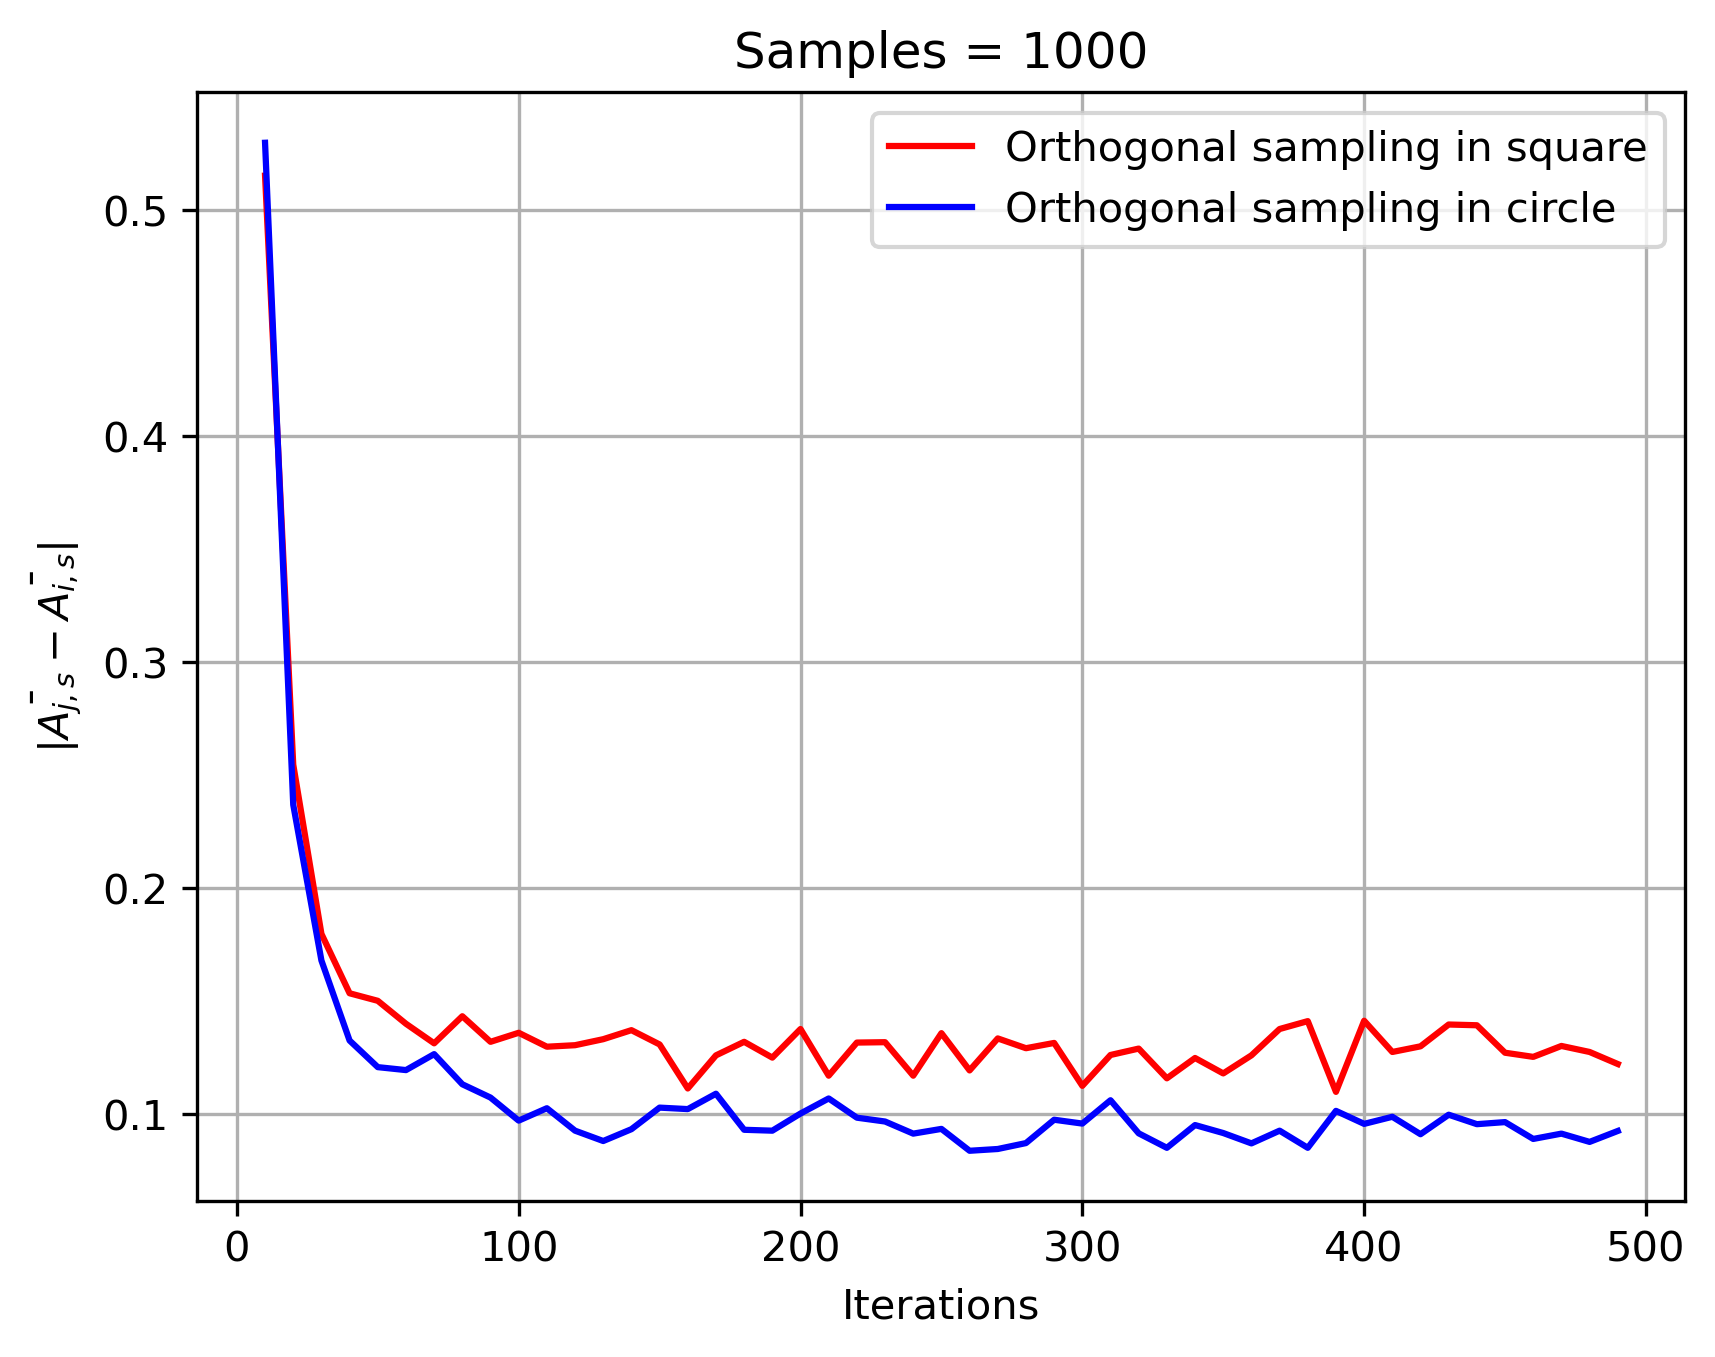

In [ ]:
# Plot
plt.figure(dpi=300)
plt.plot(iterations[:-1], mean_dA1, label="Orthogonal sampling in square", c='r')
plt.plot(iterations[:-1], mean_dA2, label="Orthogonal sampling in circle", c='b')
# plt.fill_between(iterations, low_curve1, high_curve1, color='red', alpha=0.2)
# plt.fill_between(iterations, low_curve2, high_curve2, color='blue', alpha=0.2)
plt.xlabel("Iterations")
plt.ylabel(r"$|\bar{A_{j,s}}-\bar{A_{i,s}}|$")
plt.title(f"Samples = {s}")
# plt.ylim(0, 0.1)
plt.legend()
plt.grid()
plt.show()

Constant i, varying s

In [ ]:
# Compare the convergence rate of the two orthogonal methods with constant s
max_i = 500  # Max iterations
iterations = np.arange(10, max_i + 10, 10)
s = 10000  # s is constant
n = 100  # Number of runs

# 1 for in square, 2 for in circle
areas1 = np.zeros((len(iterations), n))
areas2 = np.zeros((len(iterations), n))
for i, iter in enumerate(iterations):
    for j in range(n):
        areas1[i, j] = OS(-2, 2, iter, s)
        areas2[i, j] = OS_circle(iter, s, R=2)[-1]
mean1 = np.mean(areas1, axis=1)
mean2 = np.mean(areas2, axis=1)
std1 = np.std(areas1, axis=1, ddof=1)
std2 = np.std(areas2, axis=1, ddof=1)
dA1 = np.abs(mean1 - mean1[-1])
dA2 = np.abs(mean2 - mean2[-1])

In [ ]:
# Get the confidence intervals
confidence = 0.95  # confidence
alpha = 1 - confidence  # significance level
t_critical = stats.t.ppf((1 + confidence) / 2, df=n - 1)
conf_int1 = t_critical * std1 / np.sqrt(n)
low_curve1 = dA1 - conf_int1
high_curve1 = dA1 + conf_int1
conf_int2 = t_critical * std2 / np.sqrt(n)
low_curve2 = dA2 - conf_int2
high_curve2 = dA2 + conf_int2

# Use t-test to determine when convergence is reached
conv1, conv2 = max_i, max_i  # the first convergence iteration
for i in range(len(iterations) - 1):
    t_stat, p_val = stats.ttest_rel(area1[i], area1[i + 1])
    if p_val > alpha:
        conv1 = i + 1
for i in range(len(iterations) - 1):
    t_stat, p_val = stats.ttest_rel(area2[i], area2[i + 1])
    if p_val > alpha:
        conv2 = i + 1
print("The first iteration number that convergence is reached:")
print("OS:", conv1)
print("OSC:", conv2)

The first iteration number that convergence is reached:
OS: 49
OSC: 49


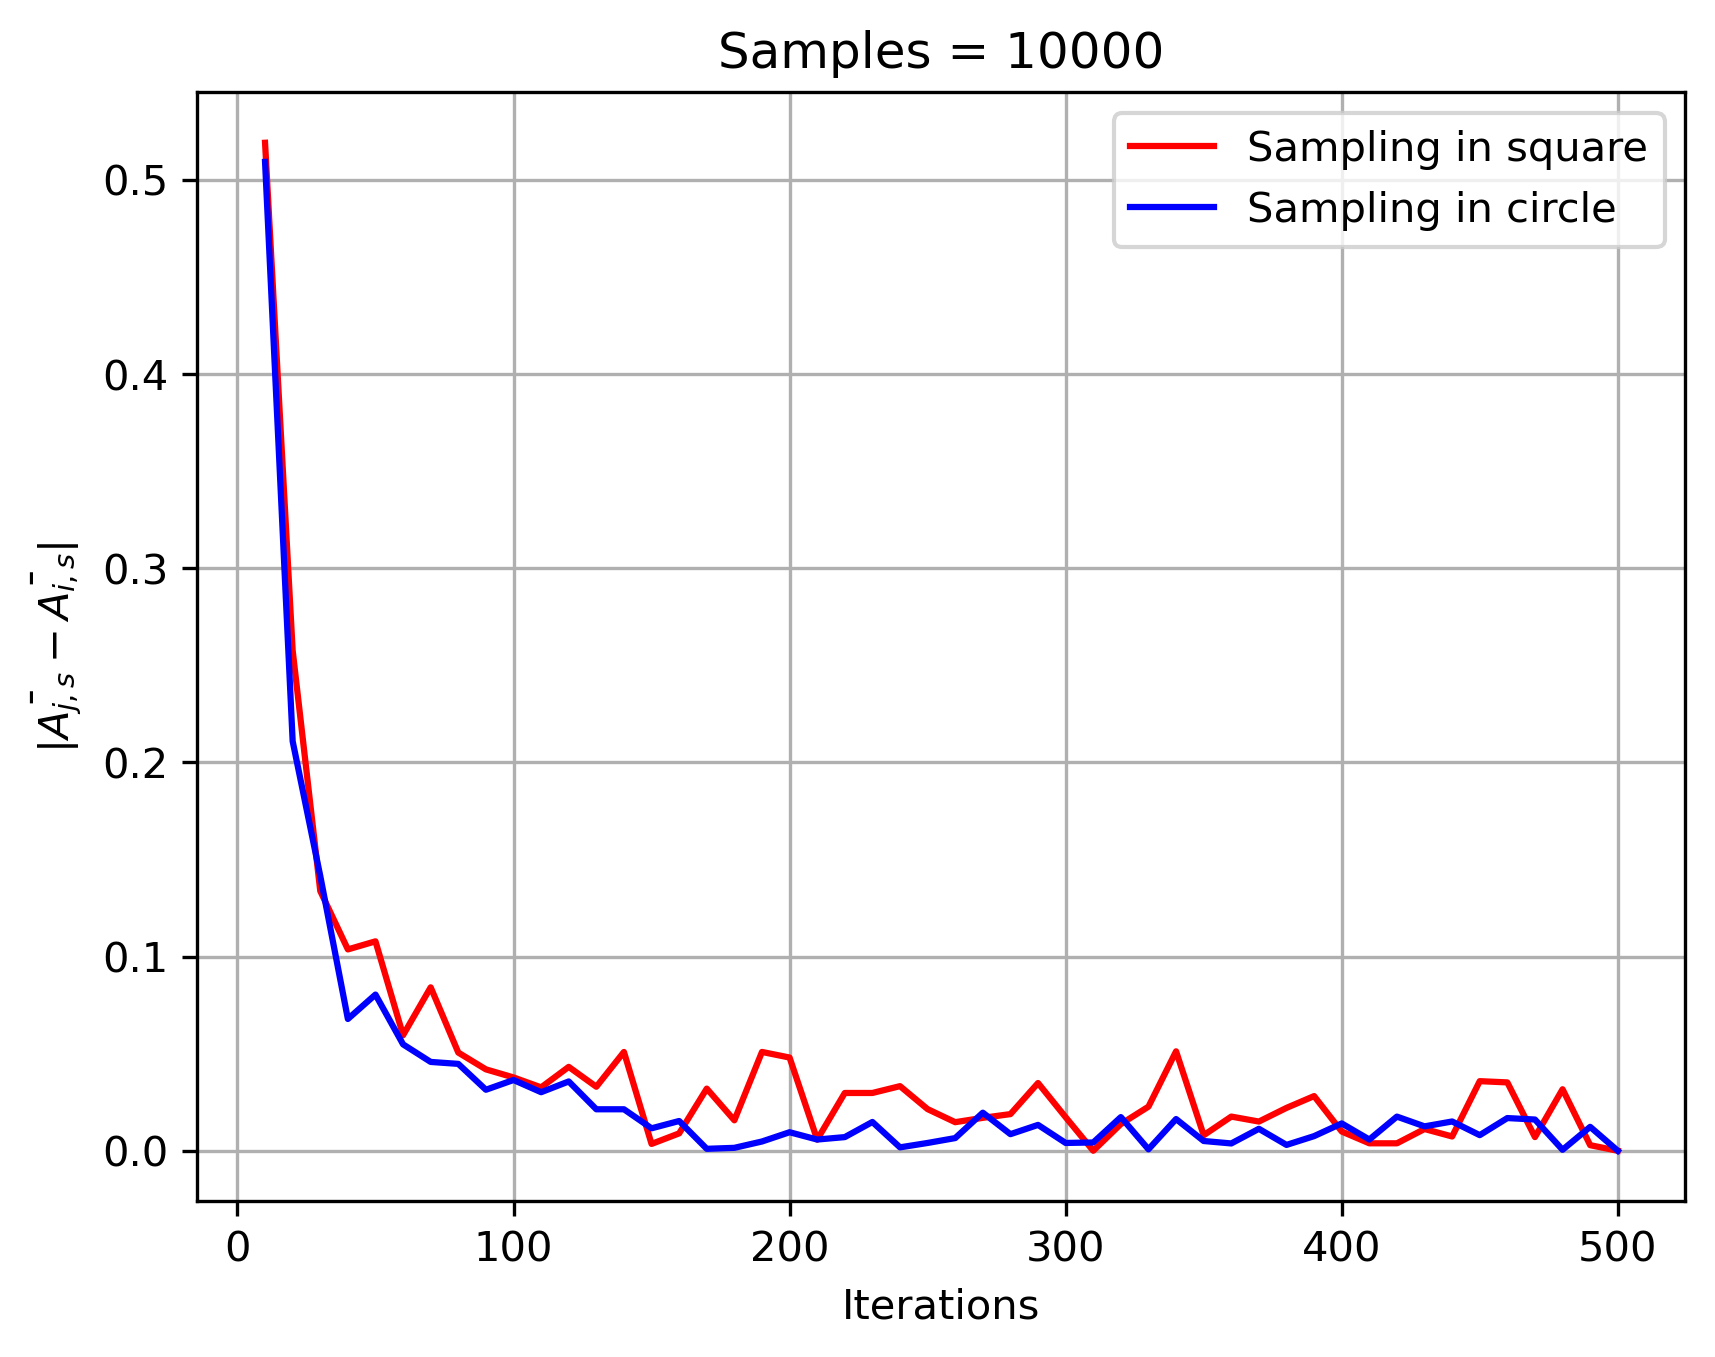

In [ ]:
# Plot
plt.figure(dpi=300)
plt.plot(iterations, dA1, label="Orthogonal sampling in square", c='r')
plt.plot(iterations, dA2, label="Orthogonal sampling in circle", c='b')
# plt.fill_between(iterations, low_curve1, high_curve1, color='red', alpha=0.2)
# plt.fill_between(iterations, low_curve2, high_curve2, color='blue', alpha=0.2)
plt.xlabel("Iterations")
plt.ylabel(r"$|\bar{A_{j,s}}-\bar{A_{i,s}}|$")
plt.title(f"Samples = {s}")
# plt.ylim(0, 0.1)
plt.legend()
plt.grid()
plt.show()

#### Quasi random sampling

Constant i, varying s

In [ ]:
# Get the data
i = 200  # iteration number
run_num = 5  # number of runs at each "s"
s_list = np.arange(5, 101, 2)
s_list = s_list**2  # list of "s"
areas = np.zeros((len(s_list), run_num))
for j, s in enumerate(s_list):  # row: different s values
    for k in range(run_num):  # column: different runs
        data_QMC[j, k] = quasiMC(-2, 2, i, s)  # areas per run
# deltaA_QMC = np.abs(data_QMC - data_QMC[-1, :])  # area difference

/Users/terry/anaconda3/lib/python3.10/site-packages/scipy/stats/_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [ ]:
# Get the convergence sample number
significance_level = 0.05
conv_s_QMC = 0
for s, area in zip(s_list, data_QMC):
    _, p_value = stats.ttest_ind(area, data_QMC[-1], equal_var=False)
    if p_value > significance_level:
        conv_s_QMC = s
        break
print("QMC:", conv_s_QMC)


QMC: 25


In [ ]:
# Prepare for plotting

std_QMC = np.std(deltaA_QMC, axis=1)
mean_QMC = np.mean(deltaA_QMC, axis=1)
conf_int_QMC = (mean_QMC - )


In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(8, 8), dpi=300)
axes[0].set_title(f"Iterations={i}")
axes[0].set_xlabel("Samples")
axes[0].set_ylabel("$|A_{i,s}-A_{i,k}|$")
axes[0].plot(s_list, mean_QMC, label='Quasi Monte Carlo', c='b')
axes[0].grid()
axes[0].legend()
axes[1].set_xlabel("Samples")
axes[1].set_ylabel("Standard Deviation")
axes[1].plot(s_list, mean_QMC, label='Quasi Monte Carlo', c='b')
axes[1].grid()
axes[1].legend()
plt.show()

Constant s, varying i

In [ ]:
# constant s, varying i
i_start, i_end, i_step = 10, 200, 10
i_s = range(i_start, i_end + i_step, i_step)
s = 500
mean_OS, mean_QMC = [], []
std_OS, std_QMC = [], []
for i in i_s:
    As_OS, As_QMC = [], []
    for j in range(100):
        As_OS.append(OS(-2, 2, i, s))
        As_QMC.append(quasiMC(-2, 2, i, s))
    mean_OS.append(np.mean(As_OS))
    mean_QMC.append(np.mean(As_QMC))
    std_OS.append(np.std(As_OS))
    std_QMC.append(np.std(As_QMC))

In [ ]:
# Get the number of iterations it took to reach the expected accuracy
mean_OS = np.array(mean_OS)
mean_QMC = np.array(mean_QMC)
std_OS = np.array(std_OS)
std_QMC = np.array(std_QMC)
deltaA_OS = np.abs(mean_OS - mean_OS[-1])
deltaA_QMC = np.abs(mean_QMC - mean_QMC[-1])
expected_accuracy = 0.01
i1 = np.where(deltaA_OS < expected_accuracy)[0][0]
i2 = np.where(deltaA_QMC < expected_accuracy)[0][0]
print("The number of iterations it took to reach the expected accuracy:")
print("Orthogonal Sampling:", i1)
print("Quasi Monte Carlo:", i2)


The number of iterations it took to reach the expected accuracy:
Orthogonal Sampling: 19
Quasi Monte Carlo: 12


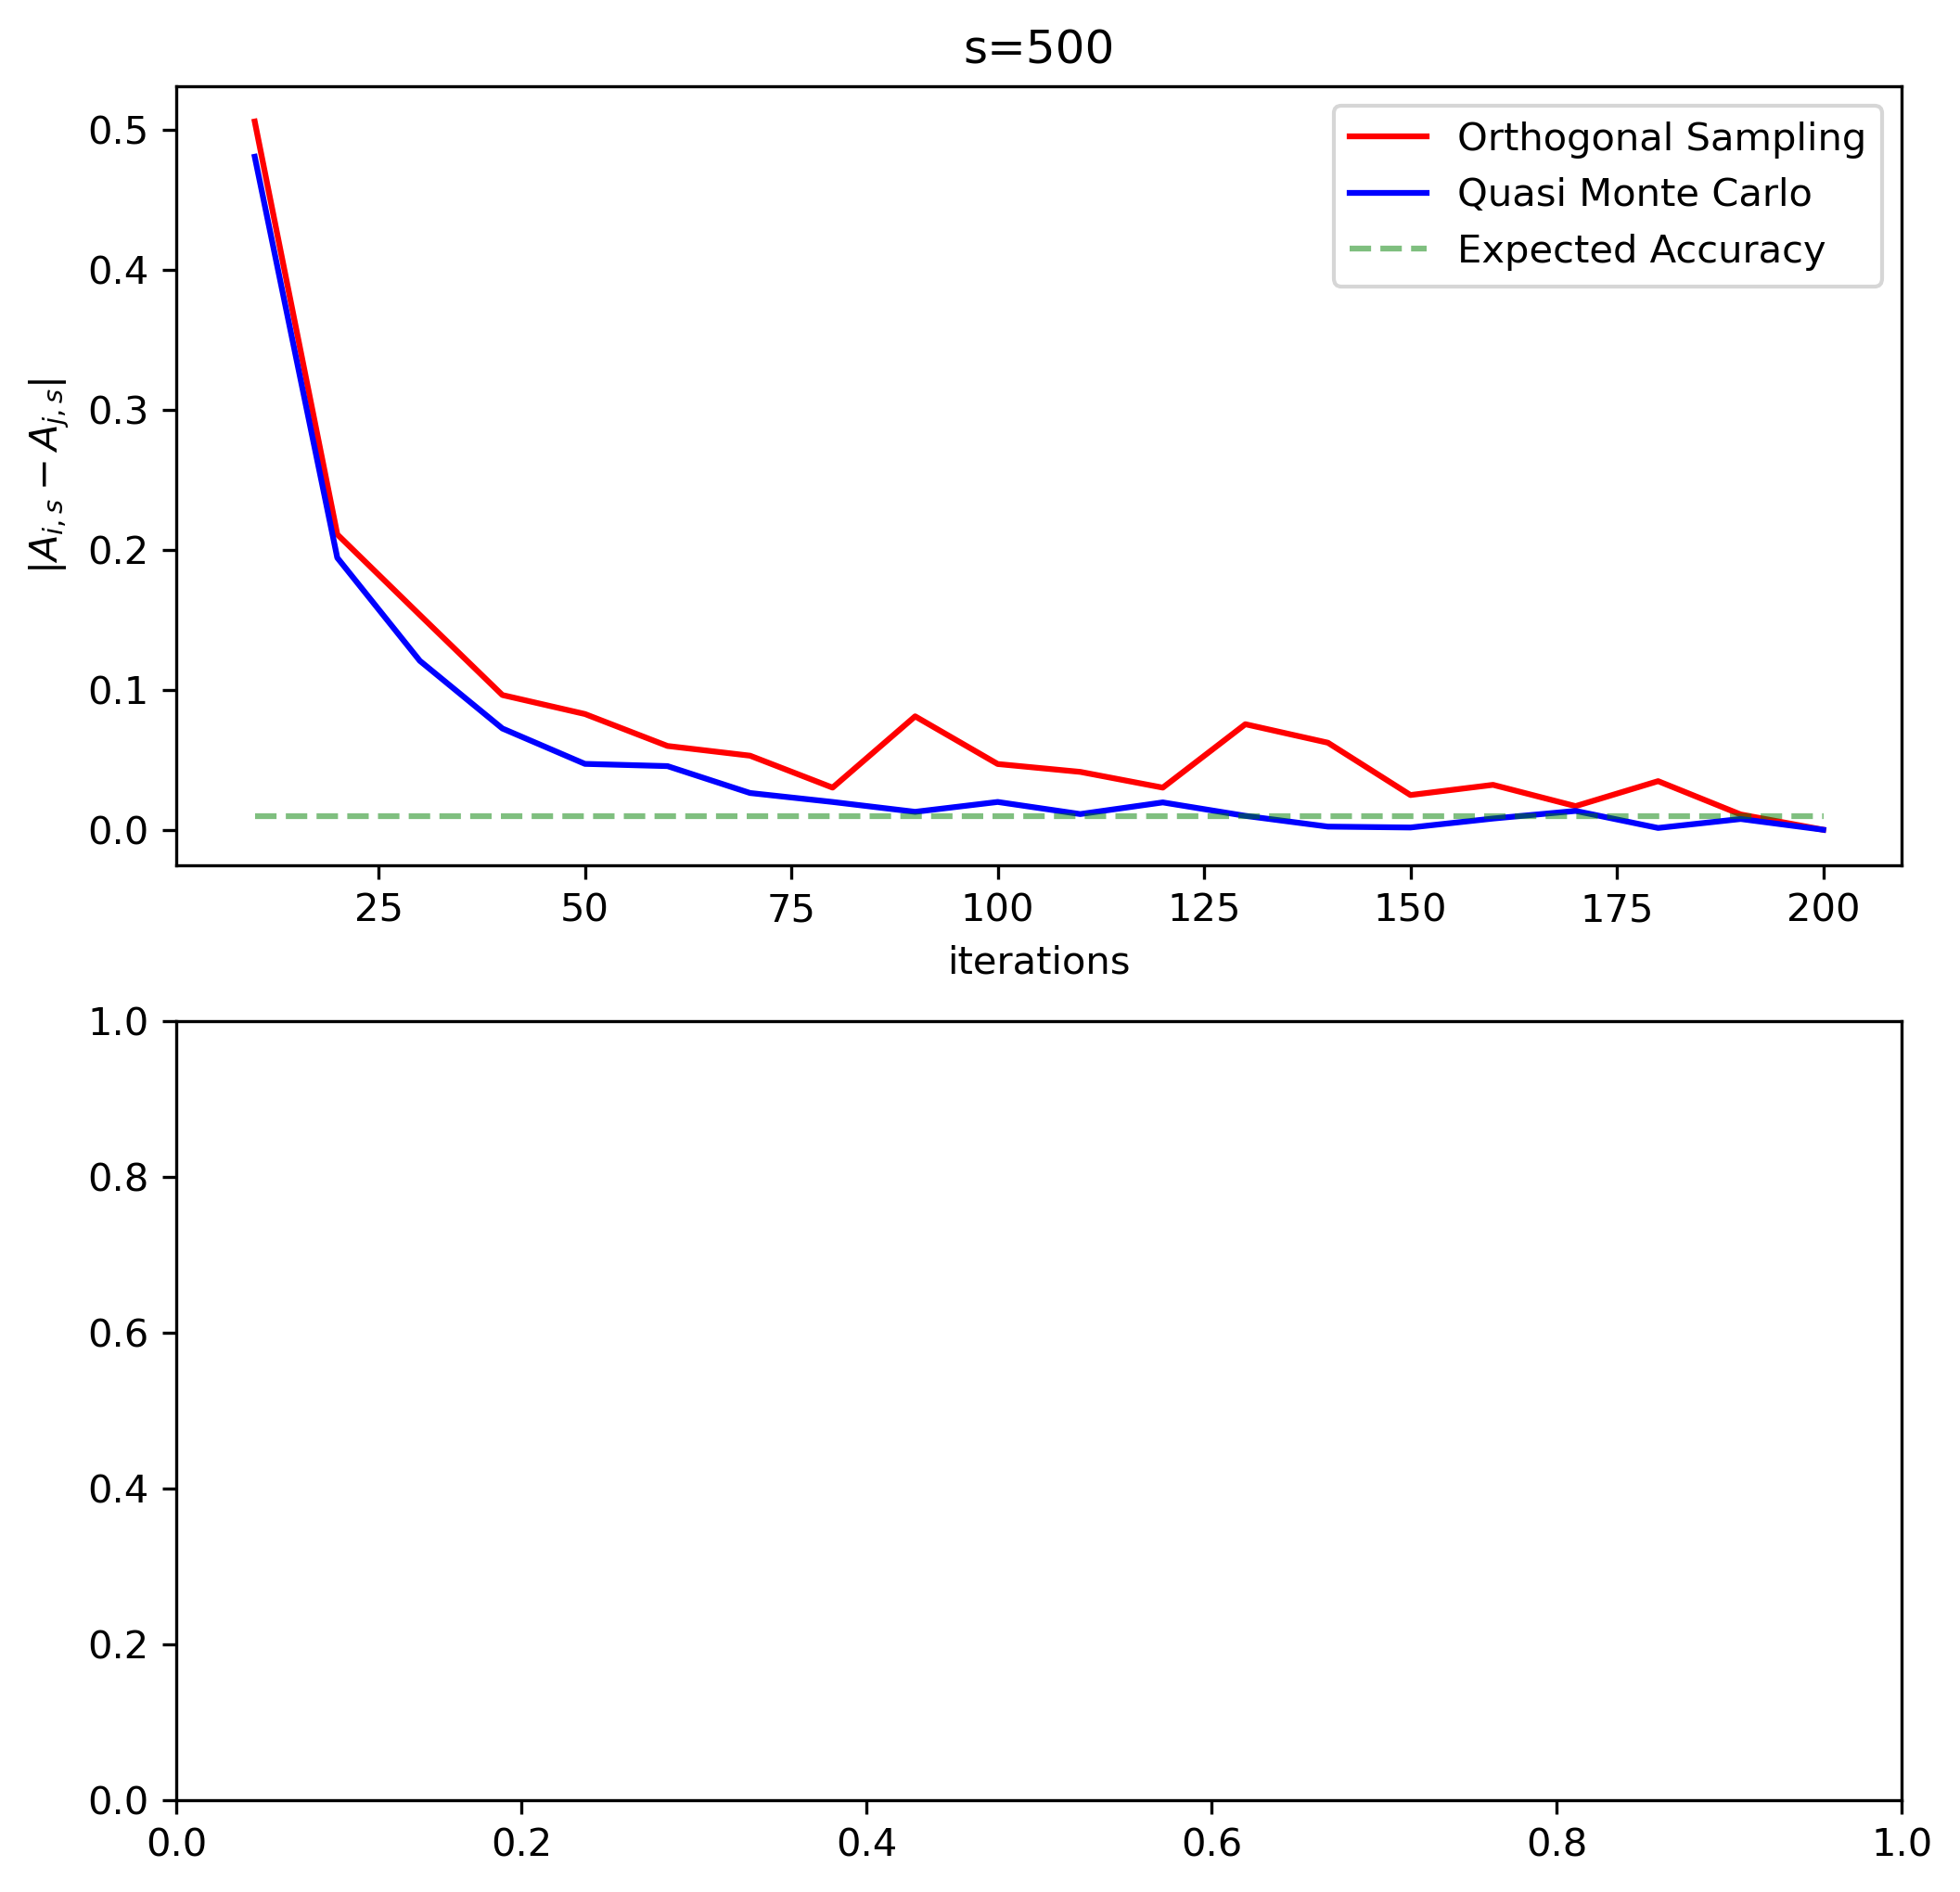

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(8, 8), dpi=300)
axes[0].set_title(f"Samples={s}")
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("$|A_{i,s}-A_{j,s}|$")
axes[0].plot(i_s, deltaA_OS, label='Orthogonal Sampling', c='r')
axes[0].plot(i_s, deltaA_QMC, label='Quasi Monte Carlo', c='b')
axes[0].hlines(expected_accuracy, i_start, i_end, linestyle='dashed', color="green", alpha=0.5, label='Expected Accuracy')
# axes[0].set_xlim(1, 50)
# axes[0].set_ylim(0, 0.1)
axes[0].legend()
# axes[1].set_xlabel("iterations")
# axes[1].set_ylabel("Standard Deviation")
# axes[1].plot(i_s, std_OS, label='Orthogonal Sampling', c='r')
# axes[1].plot(i_s, std_QMC, label='Sobol Sampling', c='b')
# axes[1].legend()
plt.show()

Compare sobol sequence with random sequence

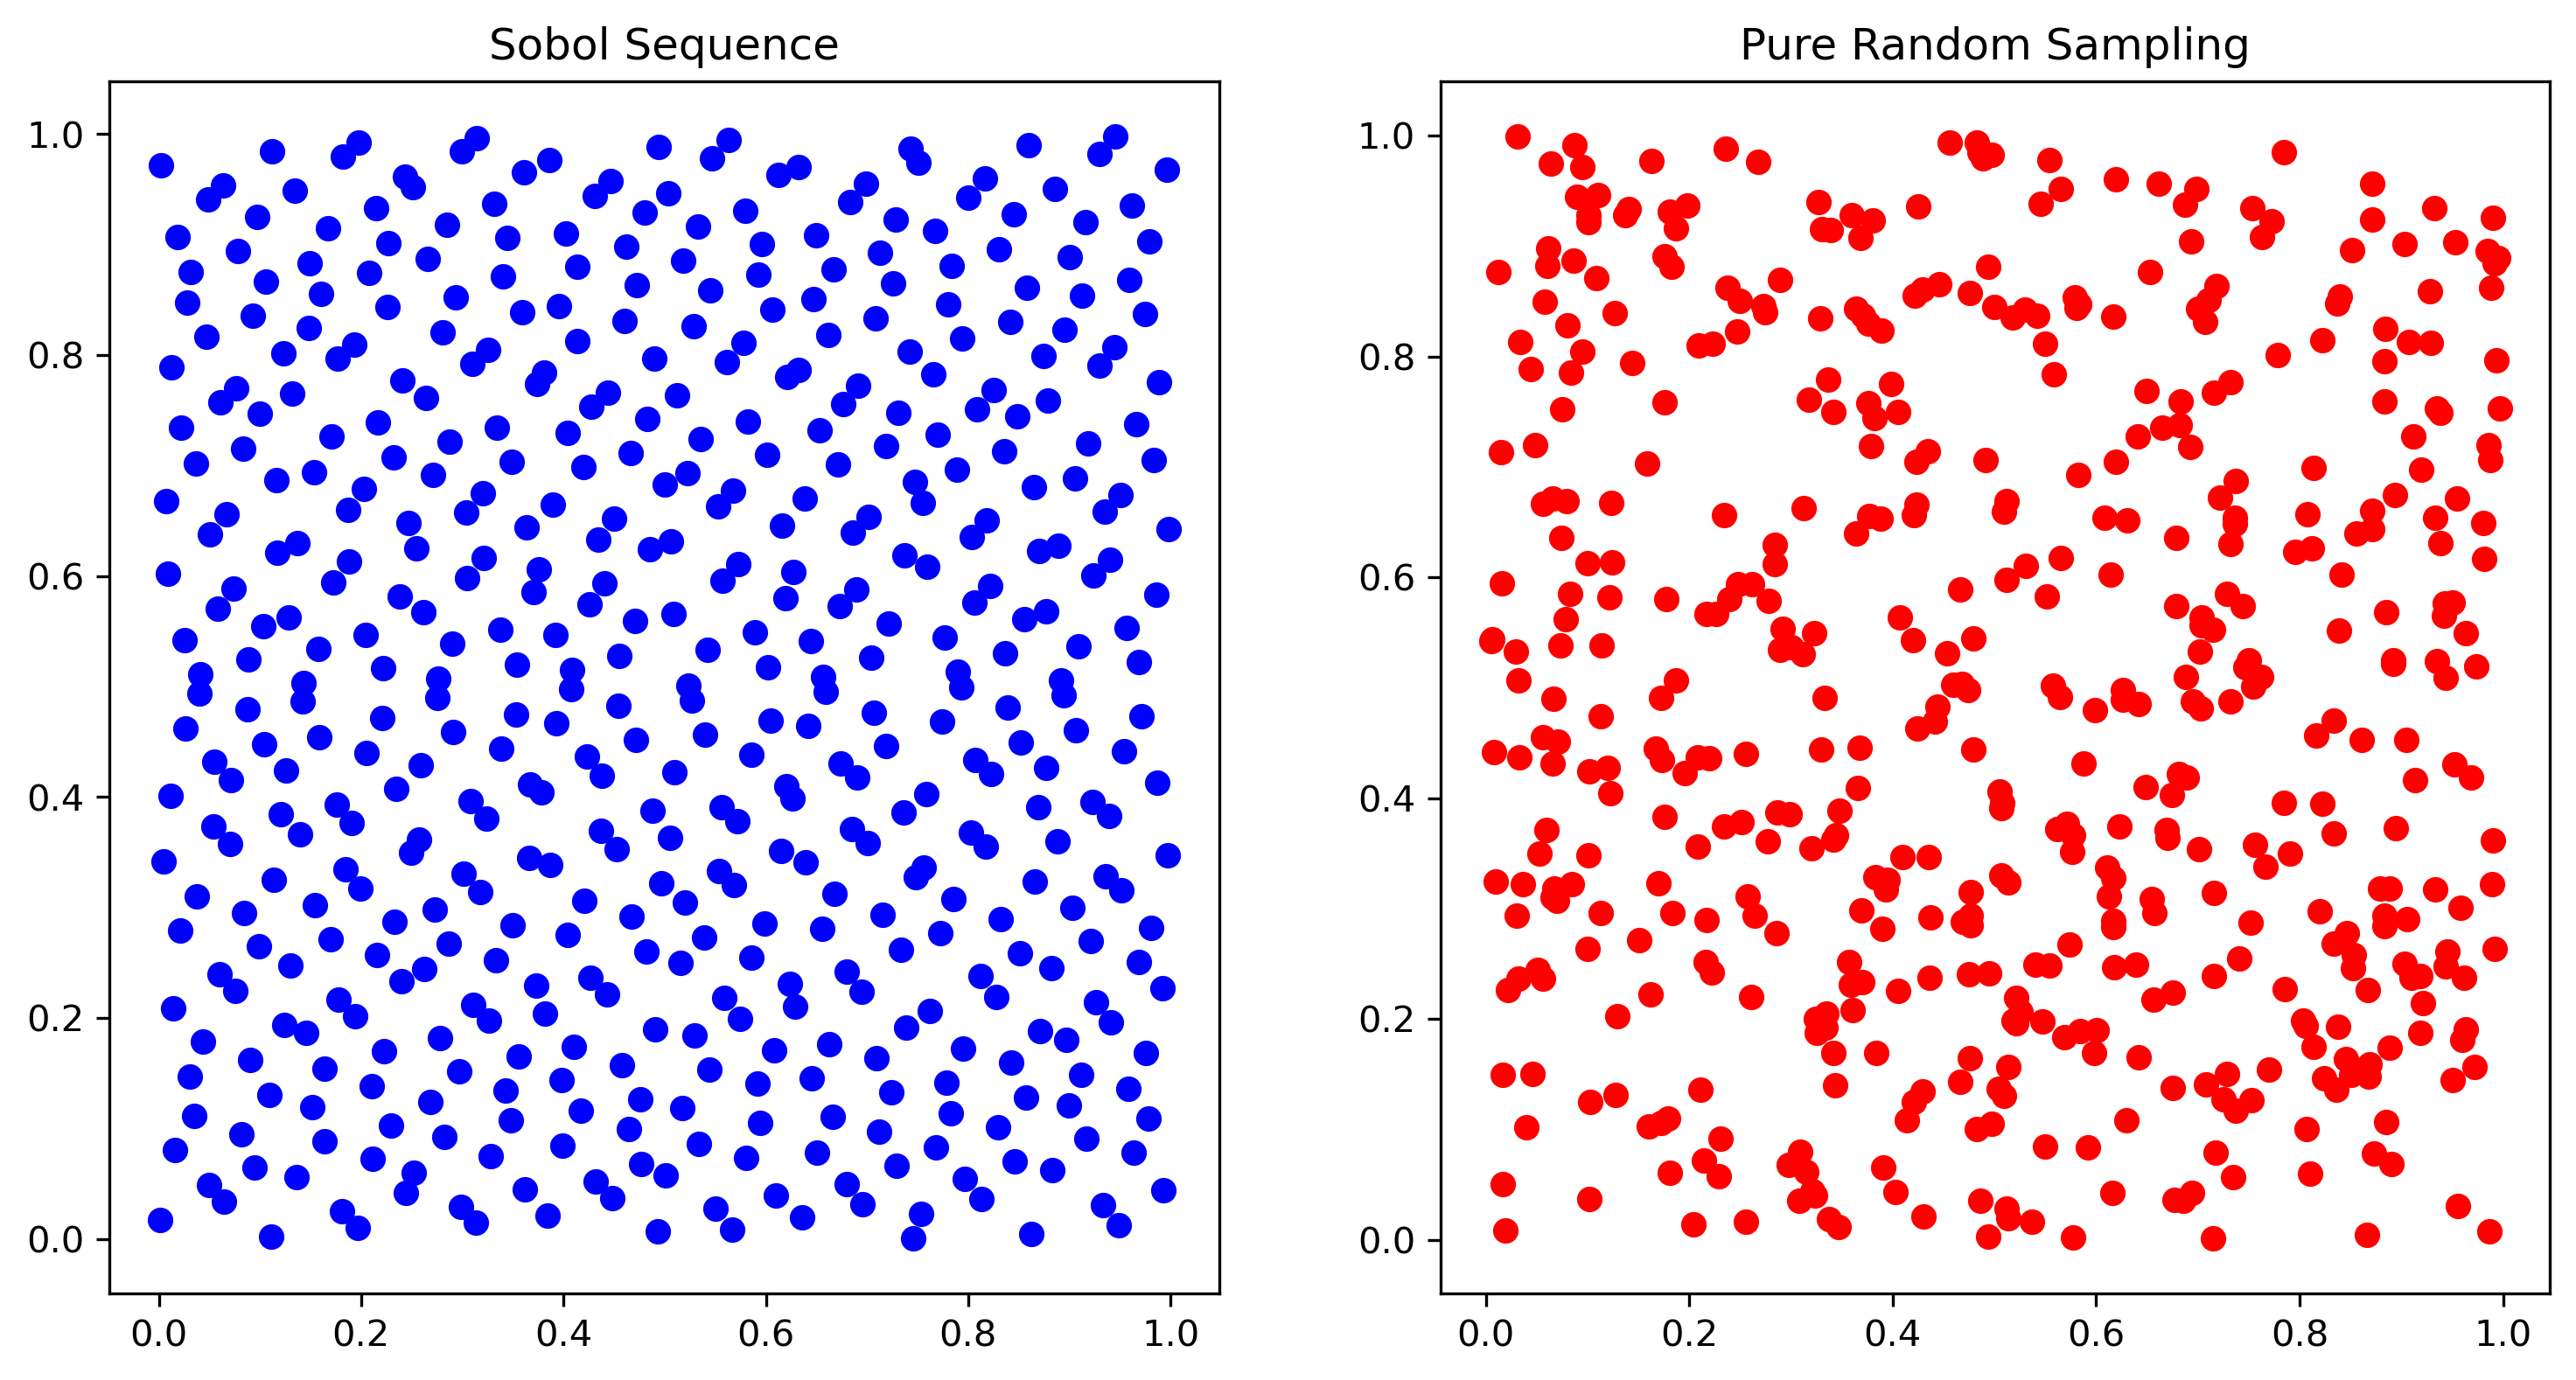

In [ ]:
# 设置样本点的数量
n_samples = 512

# 生成Sobol序列样本点
sobol = qmc.Sobol(d=2)
sobol_samples = sobol.random(n=n_samples)

# 生成纯随机样本点
random_samples = np.random.rand(n_samples, 2)

# 绘制结果
plt.figure(figsize=(12, 6), dpi=300)

# 绘制Sobol序列生成的点
plt.subplot(1, 2, 1)
plt.scatter(sobol_samples[:, 0], sobol_samples[:, 1], color='blue')
plt.title("Sobol Sequence")

# 绘制纯随机生成的点
plt.subplot(1, 2, 2)
plt.scatter(random_samples[:, 0], random_samples[:, 1], color='red')
plt.title("Pure Random Sampling")

plt.show()